# sklearn Classification - 분류

In [64]:
import warnings
warnings.filterwarnings('ignore')

# 실습용 데이터 설정 

* pandas DataFrame
 * iris.csv

In [65]:
import seaborn as sns

DF = sns.load_dataset('iris')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [66]:
DF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


> ## 1) 분석 변수 선택

* X : 'sepal_length', 'sepal_width', 'petal_length', 'petal_width'
* y : 'species'

In [67]:
X = DF[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = DF['species']

> ## 2) Train &Test Split(with stratify)

* 7:3

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (105, 4) (105,)
Test Data :  (45, 4) (45,)


In [69]:
DF['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [70]:
print(y_train.value_counts(), '\n\n', y_test.value_counts())

virginica     35
versicolor    35
setosa        35
Name: species, dtype: int64 

 virginica     15
versicolor    15
setosa        15
Name: species, dtype: int64


# I. Logistic Regression

> ## 1) 모델 생성

* C : Regularization strength
 - default : 1.0
 - 값이 작아지면 weight 값을 0에 가깝게 학습
    * 다수의 데이터포인트에 맞추려는 경향
 - 값이 커지면 weight 값을 제한하지 않음
    * 각각의 데이터포인트에 맞추려는 경향

In [71]:
%%time

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.3,
                        penalty = 'l2',
                        multi_class = 'multinomial',
                        n_jobs = -1)

LR.fit(X_train, y_train)

CPU times: user 7.18 ms, sys: 0 ns, total: 7.18 ms
Wall time: 26.8 ms


> ## 2) 모델 평가

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, LR.predict(X_test)), '\n')
print(confusion_matrix(y_test, LR.predict(X_test)))

0.9333333333333333 

[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


# II. Decision Tree Classifier

> ## 1) 모델 생성

In [102]:
%%time

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(criterion = 'entropy',
                            max_depth = 3,
                            random_state = 2045)

DT.fit(X_train, y_train)

CPU times: user 3.23 ms, sys: 35 µs, total: 3.26 ms
Wall time: 3.22 ms


> ## 2) 모델 평가

In [103]:
print(accuracy_score(y_test, DT.predict(X_test)), '\n')
print(confusion_matrix(y_test, DT.predict(X_test)))

0.8888888888888888 

[[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]


> ## 3) Feature Importance

In [75]:
DT.feature_importances_

array([0.        , 0.        , 0.64899406, 0.35100594])

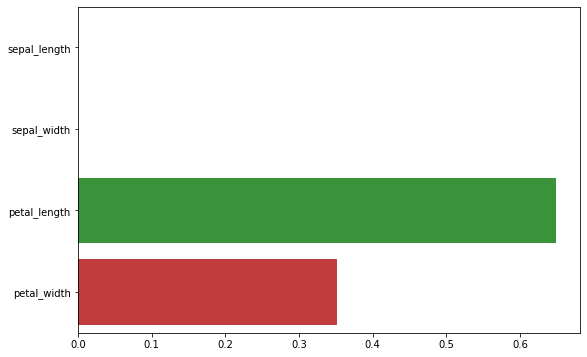

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
sns.barplot(DT.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# III. Random Forest Classifier

> ## 1) 모델 생성

In [77]:
%%time

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(criterion = 'entropy',
                            n_estimators = 100,
                            max_features = 3,
                            max_depth = 2,
                            random_state = 2045,
                            n_jobs = -1)

RF.fit(X_train, y_train)

CPU times: user 211 ms, sys: 41.7 ms, total: 253 ms
Wall time: 252 ms


> ## 2) 모델 평가

In [78]:
print(accuracy_score(y_test, RF.predict(X_test)), '\n')
print(confusion_matrix(y_test, RF.predict(X_test)))

0.9333333333333333 

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


> ## 3) Feature Importance

In [79]:
RF.feature_importances_

array([2.17808494e-04, 0.00000000e+00, 3.95922779e-01, 6.03859413e-01])

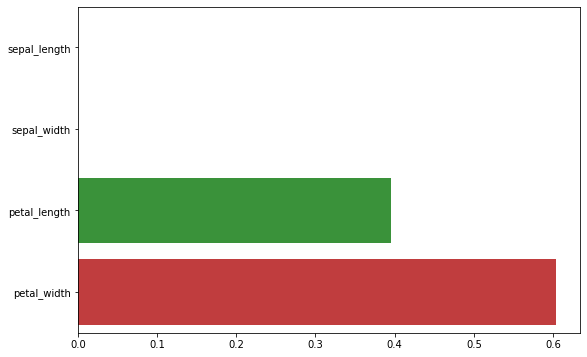

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
sns.barplot(RF.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# IV. Gradient Boosting Machine(GBM) Classifier

> ## 1) 모델 생성

* loss : 경사하강법에 사용될 오차함수
* learning_rate : 반복 학습에 적용될 학습률
 - 너무 작으면 학습 시간이 오래 걸릴 수 있음
 - 너무 크면 학습 속도는 빠르지만 최적화 되지 못할 수 있음
 - n_estimators와 함께 상호보안적으로 사용
* n_estimators : weak learner 개수
 - 약한학습기들이 순차적으로 오차를 보정
 - 많을 수록 학습시간이 길어짐

In [81]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(loss = 'deviance',
                                 n_estimators = 500,
                                 learning_rate = 0.01,
                                 max_features = 3,
                                 max_depth = 3)

GBC.fit(X_train, y_train)

CPU times: user 1.04 s, sys: 1.05 ms, total: 1.04 s
Wall time: 1.06 s


> ## 2) 모델 평가

In [82]:
print(accuracy_score(y_test, GBC.predict(X_test)), '\n')
print(confusion_matrix(y_test, GBC.predict(X_test)))

0.9333333333333333 

[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]


> ## 3) Feature Importance

In [83]:
GBC.feature_importances_

array([0.02845555, 0.08197811, 0.31118516, 0.57838118])

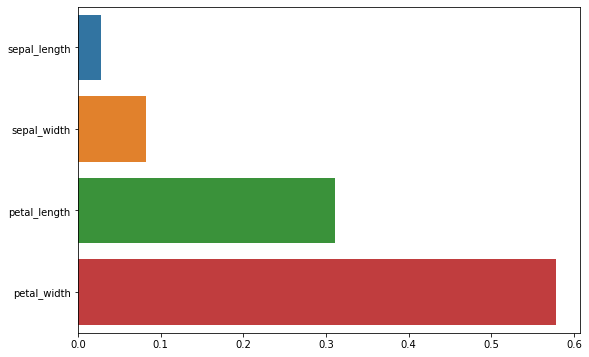

In [84]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
sns.barplot(GBC.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# V. Adaptive Boosting Classifier

> ## 1) 모델 생성

In [85]:
%%time

from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier(n_estimators = 1000,
                         learning_rate = 0.001,
                         random_state = 2045)

ABC.fit(X_train, y_train)

CPU times: user 1.55 s, sys: 4.29 ms, total: 1.56 s
Wall time: 1.57 s


> ## 2) 모델 평가

In [86]:
print(accuracy_score(y_test, ABC.predict(X_test)), '\n')
print(confusion_matrix(y_test, ABC.predict(X_test)))

0.8888888888888888 

[[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]


> ## 3) Feature Importance

In [87]:
ABC.feature_importances_

array([0.   , 0.   , 0.137, 0.863])

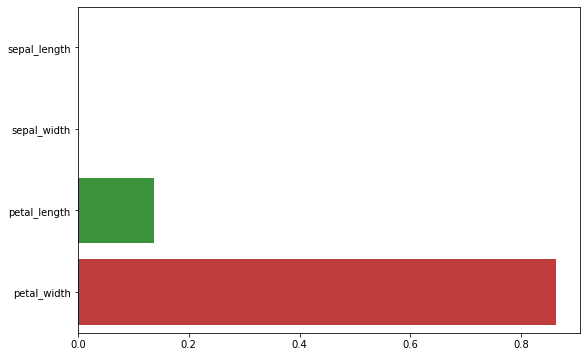

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
sns.barplot(ABC.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# VI. eXtra Gradient Boost(XGBoost) Classifier

> ## 1) 모델 생성

* booster : 'gbtree' or 'gblinear'
* reg_lambda : L2 Regularization

In [89]:
%%time

from xgboost import XGBClassifier

XGB = XGBClassifier(booster = 'gbtree',
                    n_estimators = 500,
                    learning_rate = 0.5,
                    reg_lambda = 0.05,
                    n_jobs = -1)

XGB.fit(X_train, y_train)

CPU times: user 141 ms, sys: 14.6 ms, total: 155 ms
Wall time: 90.5 ms


> ## 2) 모델 평가

In [90]:
print(accuracy_score(y_test, XGB.predict(X_test)), '\n')
print(confusion_matrix(y_test, XGB.predict(X_test)))

0.9111111111111111 

[[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]


> ## 3) Feature Importance

In [91]:
XGB.feature_importances_

array([0.00226077, 0.43800136, 0.12052245, 0.4392154 ], dtype=float32)

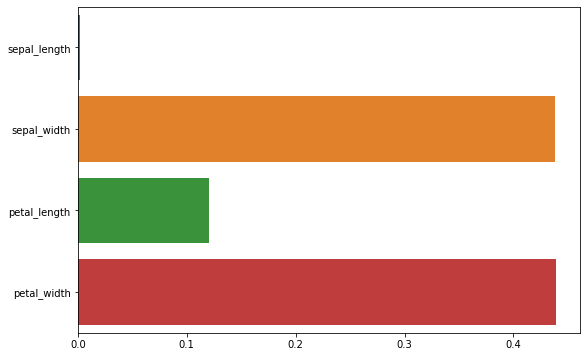

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
sns.barplot(XGB.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# VII. LightGBM Classifier

> ## 1) 모델 생성

In [93]:
%%time

from lightgbm import LGBMClassifier

LGB = LGBMClassifier(n_estimators = 500,
                     max_depth = 3,
                     learning_rate = 0.5,
                     reg_lambda = 0.2,
                     n_jobs = -1)

LGB.fit(X_train, y_train)

CPU times: user 167 ms, sys: 18.9 ms, total: 186 ms
Wall time: 100 ms


> ## 2) 모델 평가

In [94]:
print(accuracy_score(y_test, LGB.predict(X_test)), '\n')
print(confusion_matrix(y_test, LGB.predict(X_test)))

0.9555555555555556 

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


> ## 3) Feature Importance

In [95]:
LGB.feature_importances_

array([594, 704, 866, 847])

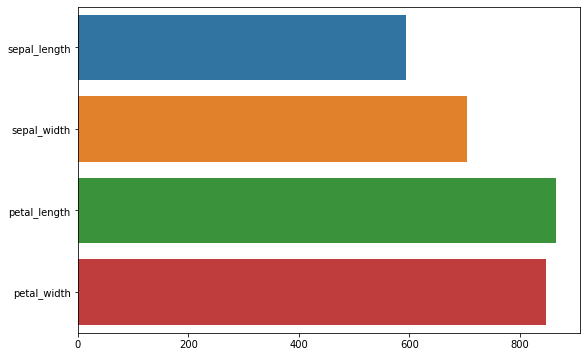

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
sns.barplot(LGB.feature_importances_,
            ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

# VIII. K-Nearest Neighbors Classifier

> ## 1) 모델 생성

In [97]:
%%time

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5,
                           n_jobs = -1)

KNN.fit(X_train, y_train)

CPU times: user 2.43 ms, sys: 37 µs, total: 2.47 ms
Wall time: 3.56 ms


> ## 2) 모델 평가

In [98]:
print(accuracy_score(y_test, KNN.predict(X_test)), '\n')
print(confusion_matrix(y_test, KNN.predict(X_test)))

0.9777777777777777 

[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


# 
# 
# 
# The End
# 
# 
# 